In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [2]:
#import data
data = pd.read_csv("BDs/kc_house_data.csv",index_col='id')

In [3]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float

In [5]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
data.isnull().sum().sum()

0

In [7]:
data.shape

(21613, 20)

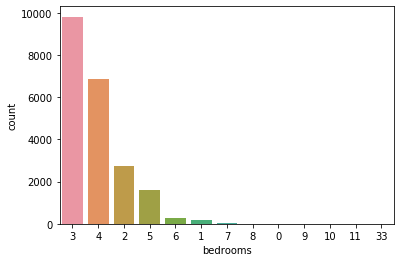

In [8]:
sns.countplot(data.bedrooms,order=data['bedrooms'].value_counts().index)

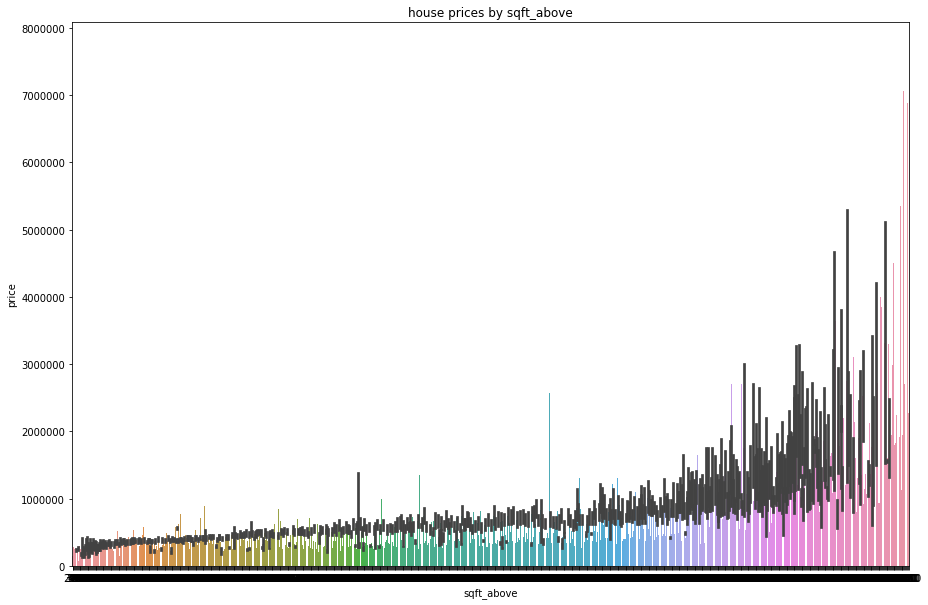

In [9]:
from numpy import median
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
plt.title("house prices by sqft_above")
plt.xlabel('sqft_above')
plt.ylabel('house prices')
sns.barplot(x='sqft_above',y='price',data=data)

In [10]:
print('Mean',data['sqft_living'].mean())
print('Median',data['sqft_living'].median())
print('Mode',data['sqft_living'].mode())

Mean 2079.8997362698374
Median 1910.0
Mode 0    1300
dtype: int64


(array([1.310e+02, 2.675e+03, 5.624e+03, 4.365e+03, 2.814e+03, 1.998e+03,
        1.554e+03, 9.960e+02, 6.730e+02, 3.270e+02, 2.170e+02, 1.020e+02,
        5.400e+01, 3.000e+01, 1.800e+01, 1.400e+01, 8.000e+00, 4.000e+00,
        0.000e+00, 2.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00]),
 array([ 290. ,  654.8, 1019.6, 1384.4, 1749.2, 2114. , 2478.8, 2843.6,
        3208.4, 3573.2, 3938. , 4302.8, 4667.6, 5032.4, 5397.2, 5762. ,
        6126.8, 6491.6, 6856.4, 7221.2, 7586. , 7950.8, 8315.6, 8680.4,
        9045.2, 9410. ]),
 <a list of 25 Patch objects>)

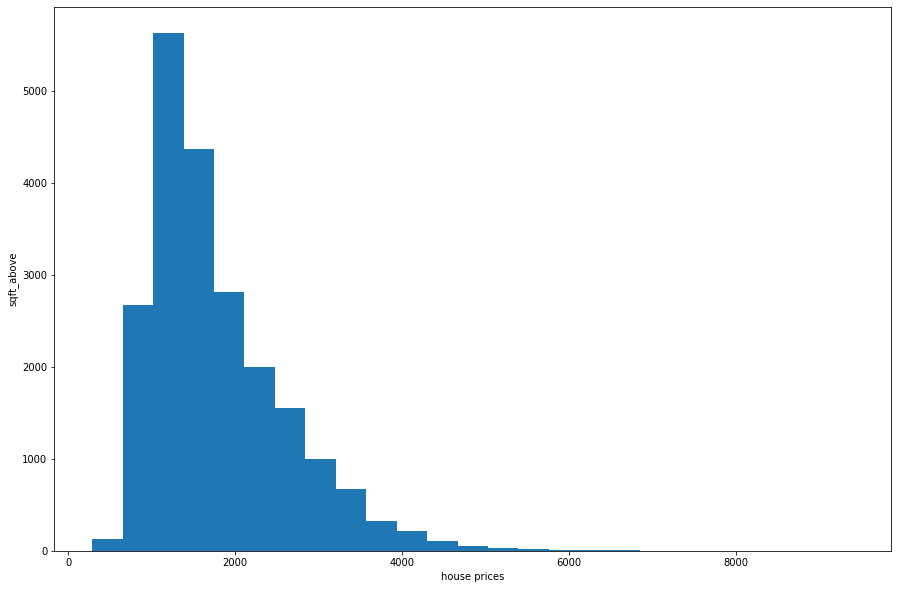

In [11]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
plt.ylabel('sqft_above')
plt.xlabel('house prices')
plt.hist('sqft_above',data=data,bins=25)

In [12]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 16 , 13 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    mask = np.triu(np.ones_like(corr, dtype=bool))


    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True,
        mask = mask,

        annot_kws = { 'fontsize' : 12 }

        )

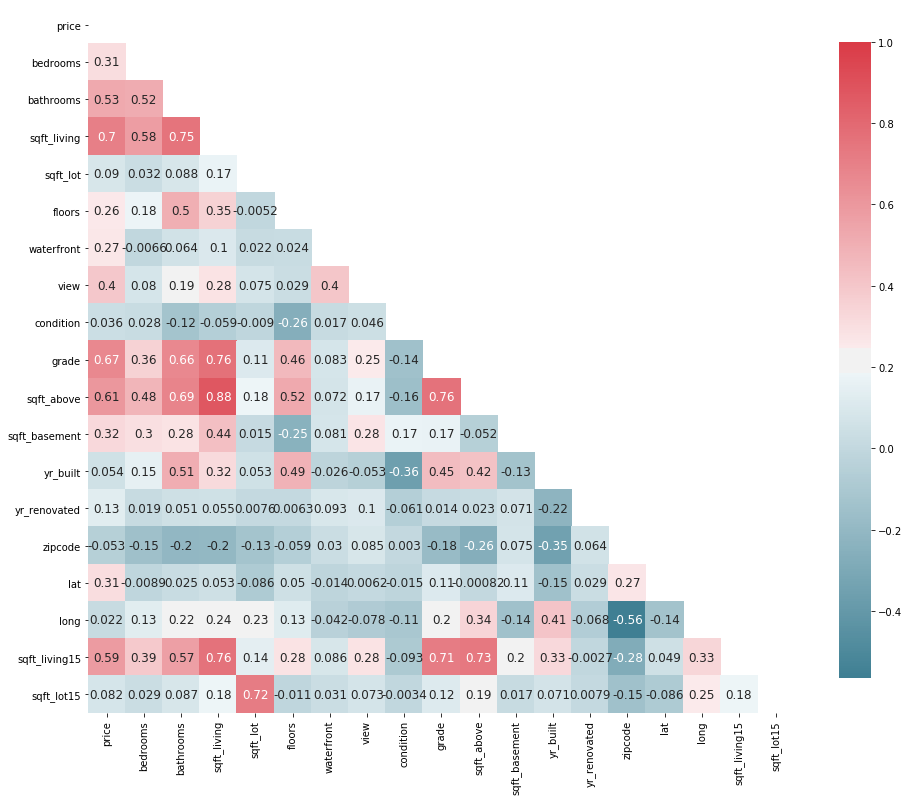

In [13]:
 plot_correlation_map(data)

## according to the correlation_map most important feature are:



-sqft_living


-grade

-sqft_above

## linear regression

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [15]:
x=data["sqft_living"].values[:,np.newaxis]
y=data["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=40) #splitting data with test size of 20%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

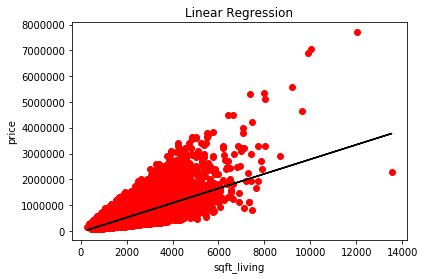

In [16]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [17]:
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 62451720102.954
R squared 0.5035535751151091


## multi-linear regression

In [18]:
x=data[["sqft_living","grade"]]  #we have more than one input
y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 57413775762.86427
R squared 0.5433112989852685


###### MSE(linear regression)>MSE(multi-linear regression)

## Polynomial regression

In [19]:
x= data[["sqft_living", "grade"]]
y= data["price"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=40)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  52465294539.436615
R squared:  0.5829385025472806


###### MSE(linear regression)>MSE(multi-linear regression)>MSE(Polynomial regression)